In [6]:
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image

In [7]:
model = load_model('resnet_model.h5')

In [8]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 48, 48, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 48, 48, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 48, 48, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_13 (Activation)           │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 24, 24, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_14 (Activation)           │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_15 (Activation)           │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │              

 Total params: 1,328,169 (5.07 MB)

 Trainable params: 1,325,991 (5.06 MB)

 Non-trainable params: 2,176 (8.50 KB)

 Optimizer params: 2 (12.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


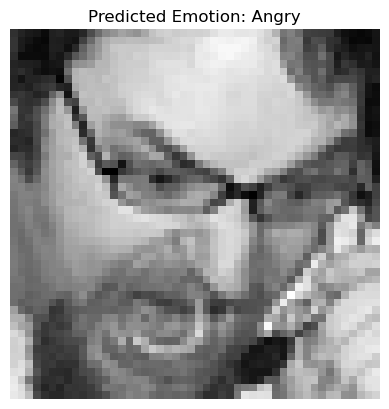

In [9]:
import matplotlib.pyplot as plt
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
img_path = 'Images/angry.jpg'
target_size = (48,48)
img = Image.open(img_path).convert('L')
img = img.resize(target_size)
img_array = np.array(img)
img_array = np.expand_dims(img_array, axis=-1) 
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array.astype('float32') / 255.0 
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)

plt.imshow(img, cmap='gray')
plt.title(f'Predicted Emotion: {emotions[predicted_class[0]]}')
plt.axis('off')
plt.show()

In [10]:
def predict_class(img):
    if img is None:
        raise ValueError("No image provided.")
    
    if isinstance(img, np.ndarray):
        img = Image.fromarray(img)
    elif hasattr(img, 'read'):
        img = Image.open(img)
    else:
        raise ValueError("Input must be either a file-like object, a numpy array, or None.")
    
    img = img.resize((48, 48)).convert('L')
    img = np.array(img)
    img = np.expand_dims(img, axis=-1)
    img = np.expand_dims(img, axis=0)
    img = img.astype('float32') / 255.0
    
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction, axis=1)
    return emotions[predicted_class[0]]

In [11]:
import gradio as gr

In [12]:
interface = gr.Interface(
    fn = predict_class,
    inputs="image",
    outputs="text",
    title="Emotion Detection Using ResNet50 Architecture",
    description="Upload an image and get the predicted emotion. Don't Select camera mode to upload image."
)

In [13]:
interface.launch()

Running on local URL:  http://127.0.0.1:7871

To create a public link, set `share=True` in `launch()`.


Received input as a numpy array.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
